_Lambda School Data Science_

# Regression Sprint Challenge

For this Sprint Challenge, you'll predict the price of used cars. 

The dataset is real-world. It was collected from advertisements of cars for sale in the Ukraine in 2016.

The following import statements have been provided for you, and should be sufficient. But you may not need to use every import. And you are permitted to make additional imports.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# From little ol' me
import graphviz
from sklearn.tree import export_graphviz

[The dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv) contains 8,495 rows and 9 variables:

- make: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel
- registration: whether car registered in Ukraine or not
- year: year of production
- drive: drive type

Run this cell to read the data:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.sample(10)

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
1233,4,3500.0,3,35,1.8,1,1,1990,0
183,43,22400.0,0,100,4.7,1,1,2005,1
856,74,29500.0,0,90,2.7,1,1,2010,1
3904,33,4600.0,1,140,1.1,1,1,2006,0
457,42,39900.0,0,120,5.0,3,1,2012,1
3351,57,2449.0,2,200,1.6,1,0,2000,0
315,50,109999.0,0,1,3.0,0,1,2016,1
5238,80,4000.0,3,78,1.3,1,1,2011,0
3764,4,34000.0,0,119,2.0,0,1,2013,1
4,55,16600.0,0,83,2.0,3,1,2013,1


# Predictive Modeling with Linear Regression

## 1.1 Split the data into an X matrix and y vector (`price` is the target we want to predict).

In [3]:
X = df.drop(columns = 'price')
y = df[['price']]

In [4]:
X.head()

,make,body,mileage,engV,engType,registration,year,drive
0,23,0,68,2.5,1,1,2010,1
1,50,3,173,1.8,1,1,2011,2
2,50,2,135,5.5,3,1,2008,2
3,50,5,162,1.8,0,1,2012,0
4,55,0,83,2.0,3,1,2013,1


In [5]:
y.head()

,price
0,15500.0
1,20500.0
2,35000.0
3,17800.0
4,16600.0


## 1.2 Split the data into test and train sets, using `train_test_split`.
You may use a train size of 80% and a test size of 20%.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.80, 
                                                    test_size = 0.20, 
                                                    random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6796, 8), (1699, 8), (6796, 1), (1699, 1))

## 1.3 Use scikit-learn to fit a multiple regression model, using your training data.
Use `year` and one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

In [7]:
features = ['year', 'mileage']

model = LinearRegression().fit(X_train[features], y_train)


## 1.4 Report the Intercept and Coefficients for the fitted model.

In [8]:
model.coef_ 

array([[1047.96289234,  -45.95570888]])

In [9]:
model.intercept_

array([-2080152.81683216])

## 1.5 Use the test data to make predictions.

In [10]:
# Predict based on X_test

model.predict(X_test[features])

array([[25958.82569853],
       [12832.66613332],
       [31446.45552841],
       ...,
       [20535.1884013 ],
       [  230.919839  ],
       [21822.81189937]])

In [11]:
# Or Specific Values

model.predict([[2011, 110]])

array([[22245.43169117]])

## 1.6 Use the test data to get both the Root Mean Square Error and $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [12]:
# I want a reference point for my RSME 
np.mean(df[['price']])

price    16185.453305
dtype: float64

In [13]:
# Root Mean Square Error
np.sqrt(mean_squared_error( y_test, model.predict(X_test[features])))

23023.641383164486

In [14]:
# R^2 Score:  
r2_score(y_test, model.predict(X_test[features]))

0.1802189032887348

## 1.7 How should we interpret the coefficient corresponding to the `year` feature?
One sentence can be sufficient

The coefficient for the year is positive. This implies that the newer the car is, the higher the sale price is. 

## 1.8 How should we interpret the Root Mean Square Error?
One sentence can be sufficient

RSME is pretty high. In fact, it is bigger than the mean price of a car. That means this model does not make accurate predictions. 

## 1.9 How should we interpret the $R^2$?
One sentence can be sufficient

The $R^2$ score is pretty low. This indicates that the data does not closely fit our regression model. Most of the data is not properly explained by the model. 

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [15]:
df['ln_price'] = np.log(df['price'])

X = df.drop(columns = ['price', 'ln_price'])
y = df[['ln_price']]

X_train_ln, X_test_ln, y_train_ln, y_test_ln = train_test_split(X, y, 
                                                    train_size = 0.80, 
                                                    test_size = 0.20, 
                                                    random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6796, 8), (1699, 8), (6796, 1), (1699, 1))

## 2.2 Visualize scatterplots of the relationship between each feature versus the log of price, to look for non-linearly distributed features.
You may use any plotting tools and techniques.

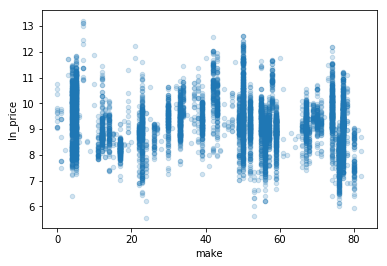

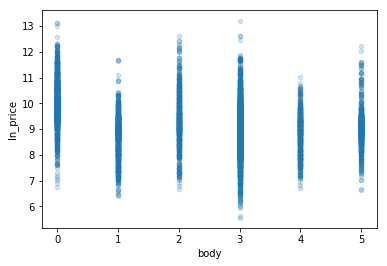

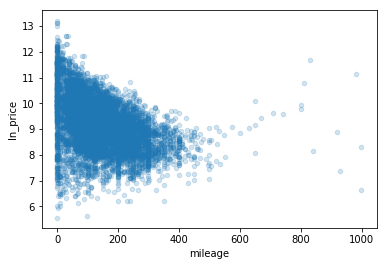

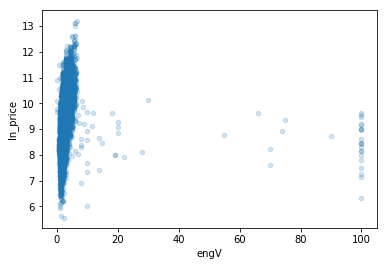

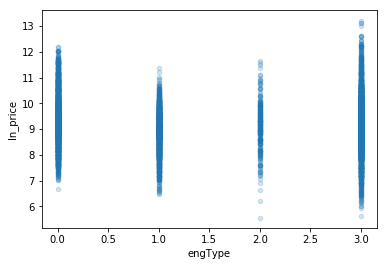

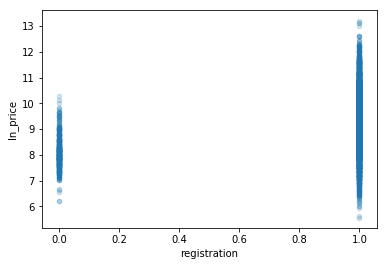

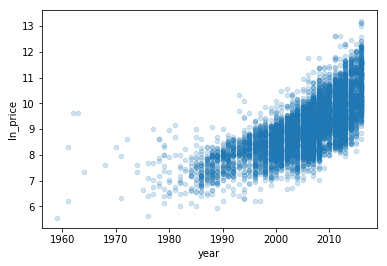

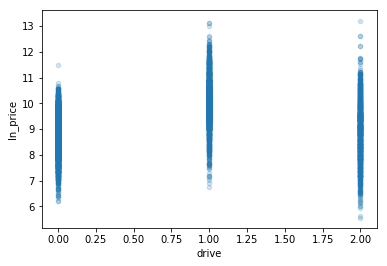

In [16]:
columns = X.columns.tolist()

for column in columns:
        df.plot.scatter(column,'ln_price', alpha =0.2)

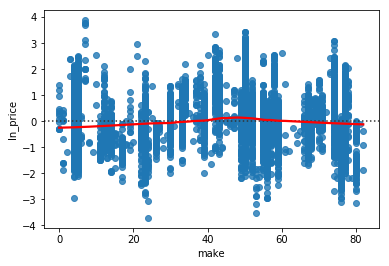

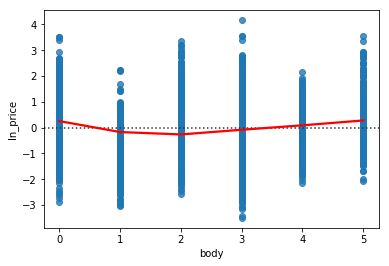

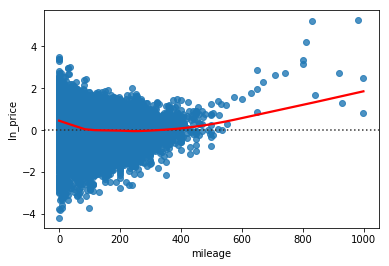

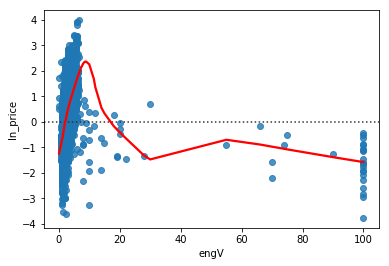

/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


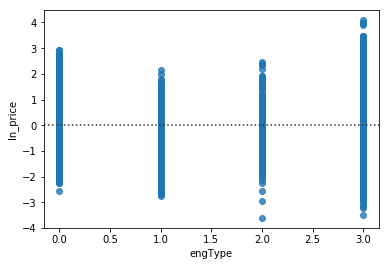

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


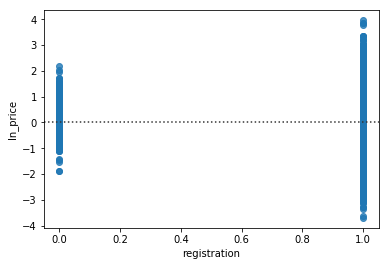

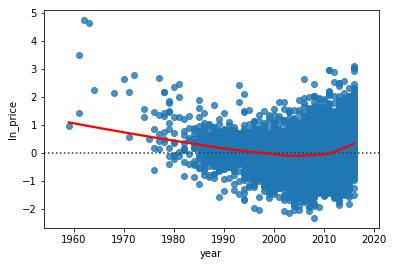

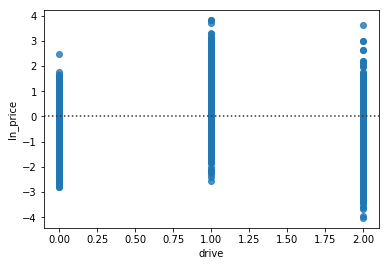

In [17]:
for column in columns:
    sns.residplot(df[column], df['ln_price'], lowess=True, line_kws=dict(color='r'))
    plt.show()

Year, Mileage and engV all look to be good candidates for Polynoial features. 

## 2.3 Create polynomial feature(s)
You will not be evaluated on which feature(s) you choose. But try to choose appropriate features.

In [18]:
df['sq_mileage'] = df['mileage']**2
df['sq_year'] = df['year']**2
df['sq_engV'] = df['engV']**2

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [19]:
features = ['engV','sq_engV','year','sq_year','mileage','sq_mileage']

model = LinearRegression().fit(X_train_ln, y_train_ln)

print('RMSE: ', np.sqrt(mean_squared_error( y_test_ln, model.predict(X_test_ln))))
print('R^2: ', r2_score(y_test_ln, model.predict(X_test_ln)))
print()
print("Coefficient: ",  model.coef_ )
print("Intercept: ", model.intercept_)

RMSE:  0.5845598209790612
R^2:  0.6434442979521512

Coefficient:  [[-1.52681064e-03 -9.35510337e-02 -2.96468789e-05  8.70319193e-03
  -5.80216535e-02  7.31811098e-01  9.55180643e-02  3.89875953e-01]]
Intercept:  [-183.02593585]


## 2.5 How do we interpret coefficients in Log-Linear Regression (differently than Ordinary Least Squares Regression)?
One sentence can be sufficient

We can interpret the coefficients in Log_Linear Regression as percent change. OLS regression interprets coefficients in terms of elasticity. So in this model, an OLS coefficient translates a change in x to change in monetary value. 

# Decision Trees

## 3.1 Use scikit-learn to fit a decision tree regression model, using your training data.
Use one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

You may use the log-transformed target or the original un-transformed target. You will not be evaluated on which you choose.

In [20]:
# I'll use the original data, not the log-transformed data. 
model = DecisionTreeRegressor(max_depth = 3).fit(X_train, y_train)

## 3.2 Use the test data to get the $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

R^2 Score:  0.6833848010956896


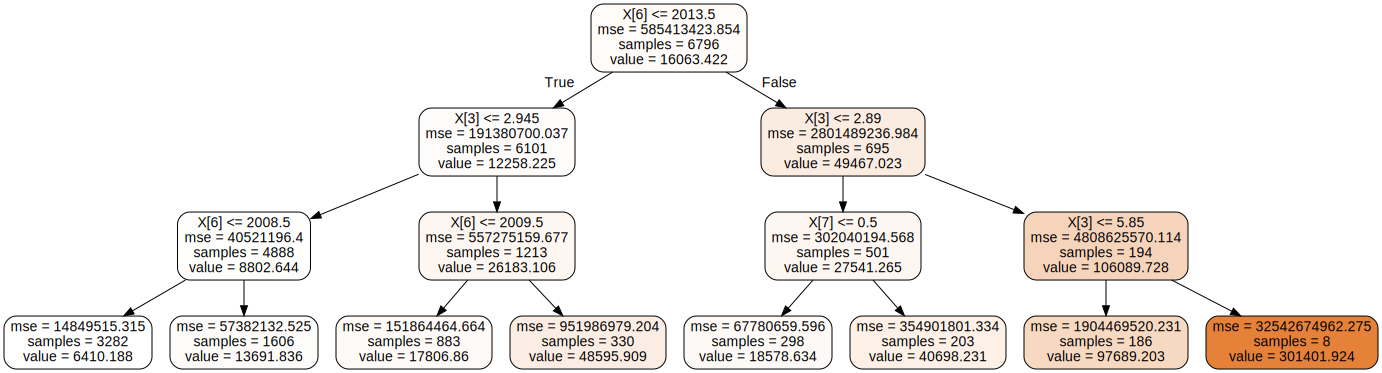

In [21]:
print('R^2 Score: ', r2_score(y_test, model.predict(X_test)))
# Also, have a pretty tree. 

dot_data = export_graphviz(model, out_file=None, 
                           filled=True, rounded=True) 

graphviz.Source(dot_data)


# Regression Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [22]:
X = df[features]
y = df[['ln_price']]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     2009.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        12:09:46   Log-Likelihood:                -7100.8
No. Observations:                8495   AIC:                         1.422e+04
Df Residuals:                    8488   BIC:                         1.426e+04
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8491.6601    813.087     10.444      0.0

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. 

### Do we have multicollinearity problems?
One sentence can be sufficient

In [23]:
X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(vif, X.columns)

const         3.288290e+09
engV          2.046922e+01
sq_engV       2.047433e+01
year          1.578006e+05
sq_year       1.581006e+05
mileage       6.739697e+00
sq_mileage    4.911452e+00
dtype: float64

We have multicolinearity problems. They mostly seem to regard the polynomial features. Let's see what happens when I get rid of their linear counterparts. I'll keep mileage as the multicolinearity is not _that_ high. 

In [24]:
features = ['sq_engV','sq_year','mileage','sq_mileage']

X = sm.add_constant(df[features])
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(vif, X.columns)

const         29070.846702
sq_engV           1.002599
sq_year           1.361806
mileage           4.846934
sq_mileage        4.262756
dtype: float64

Much better!